In [1]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binned_statistic
from tqdm import tqdm
import astropy.units as u
from astropy.coordinates import SkyCoord, search_around_sky

import matplotlib
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [2]:
def percentile_16(arr):
    return np.percentile(arr,16)

def percentile_84(arr):
    return np.percentile(arr,84)

In [19]:
#matched between cosmos_v9, cosmos2020 and shiraz (keeps objects in all three catalogs only)

cat = Table.read('/Volumes/LejaySSD/COSMOS_deep_clauds_hsc_shiraz_cosmos2020_photometry.fits')
coord_cat = SkyCoord(np.array(cat['RA']) * u.deg, np.array(cat['DEC']) * u.deg)

#### massive gals

In [17]:
cat_all=Table.read('/Volumes/LejaySSD/COSMOS_deep_CLAUDS_v9_CH1_CH2.fits')
cat_massive = cat_all[cat_all['MASS_MED']>11.3]
print(len(cat_massive))

75675


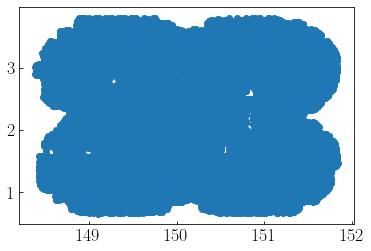

In [36]:
plt.scatter(cat_massive_z['RA'],cat_massive_z['DEC'])

In [18]:
cat_massive_z = cat_massive[cat_massive['ZPHOT']<1.1]
cat_massive_z = cat_massive_z[cat_massive_z['ZPHOT']>0.3]
print(len(in_geometry))

22857


In [53]:
base =4000
in_geometry=0
matched=0
for gal in tqdm(cat_massive_z):
    coord_gal = SkyCoord(gal['RA']*u.deg,gal['DEC']*u.deg)
    if min(coord_gal.separation(coord_cat).degree)<45/3600.0:
        in_geometry += 1
        if gal['MAG_AUTO_CH1']>-99: # matched
            matched += 1

print(len(cat_massive_z),matched,in_geometry,matched/in_geometry)
            

100%|██████████| 22857/22857 [06:34<00:00, 58.01it/s]

22857 4667 4914 0.9497354497354498


#### ra/dec skyplot

In [34]:
cat_v9 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params_sfq_added.fits')
cat_v9 = cat_v9[cat_v9['inside_u'] == True]
cat_v9 = cat_v9[cat_v9['MASK'] == 0]  # unmasked
cat_v9_gal = cat_v9[cat_v9['OBJ_TYPE'] == 0]  # galaxies

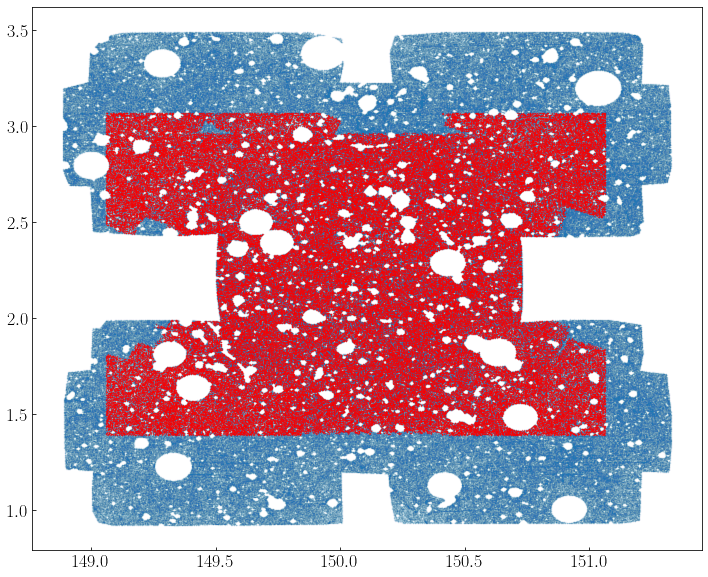

In [35]:
fig = plt.figure(figsize=(12,10))

plt.scatter(cat_v9_gal['RA'],cat_v9_gal['DEC'],s=0.1,alpha=0.1)
plt.scatter(cat['RA'],cat['DEC'],s=0.1,alpha=0.8,color='r')
plt.show()

In [5]:
cat = cat[cat['i']<26]
cat = cat[cat['ZPHOT']<1.5]

cat = cat[cat['i']>0]
cat = cat[cat['HSC_i_MAG_AUTO']>0]
cat = cat[cat['MAG_AUTO_CH1']>0]
cat = cat[cat['MAG_AUTO_CH2']>0]
cat = cat[cat['IRAC_CH1_MAG']>0]
cat = cat[cat['IRAC_CH2_MAG']>0]

cat = cat[cat['i']<90]
cat = cat[cat['HSC_i_MAG_AUTO']<90]
cat = cat[cat['MAG_AUTO_CH1']<90]
cat = cat[cat['IRAC_CH1_MAG']<90]
cat = cat[cat['MAG_AUTO_CH2']<90]
cat = cat[cat['IRAC_CH2_MAG']<90]
print(len(cat))

122365


In [6]:
# select only isolated galaxies (5 arcsec separation, 1mag difference)
print(len(cat))

coords = SkyCoord(np.array(cat['RA']) * u.deg, np.array(cat['DEC']) * u.deg)
arr = search_around_sky(coords, coords, 10 / 3600 * u.deg)
sep2d, b = np.unique(np.round(arr[2], 10), return_index=True)  # only keep the unique pairs
arr0 = arr[0][b]
arr1 = arr[1][b]
gal1_list = arr0[sep2d.value > 0.01 / 3600]
gal2_list = arr1[sep2d.value > 0.01 / 3600]

remove_ids = []
for i in range(len(gal1_list)):
    if abs(cat[gal1_list[i]]['HSC_i_MAG_AUTO'] - cat[gal2_list[i]]['HSC_i_MAG_AUTO'])<1:
        remove_ids.append(gal1_list[i])
        remove_ids.append(gal2_list[i])
print(len(remove_ids))
cat.remove_rows(remove_ids)
print(len(cat))

122365
67138
72224


#### check $i-CH1$ and $i-CH2$ colors with COSMOS2020

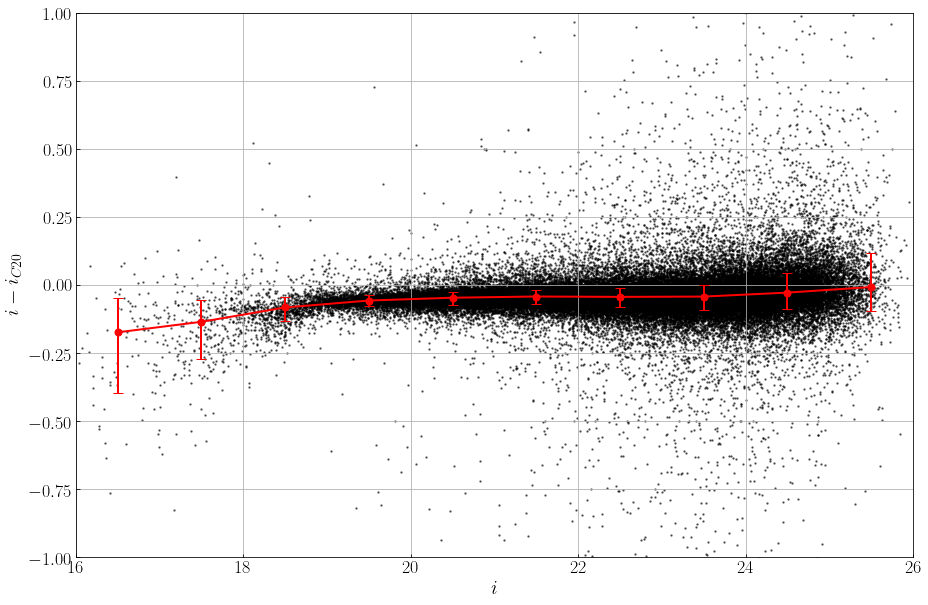

In [7]:
color_diff =  cat['i']-cat['HSC_i_MAG_AUTO']
medians_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
per16_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic=percentile_16, bins=np.arange(16,27,1))
per84_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic=percentile_84, bins=np.arange(16,27,1))

fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.5)
plt.errorbar(bin_edges[:-1]+0.5,medians_ch1,yerr=[medians_ch1-per16_ch1,per84_ch1-medians_ch1],fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$i-i_{C20}$',fontsize=20)
plt.xlim([16,26])
plt.ylim([-1,1])
plt.grid()
plt.show()

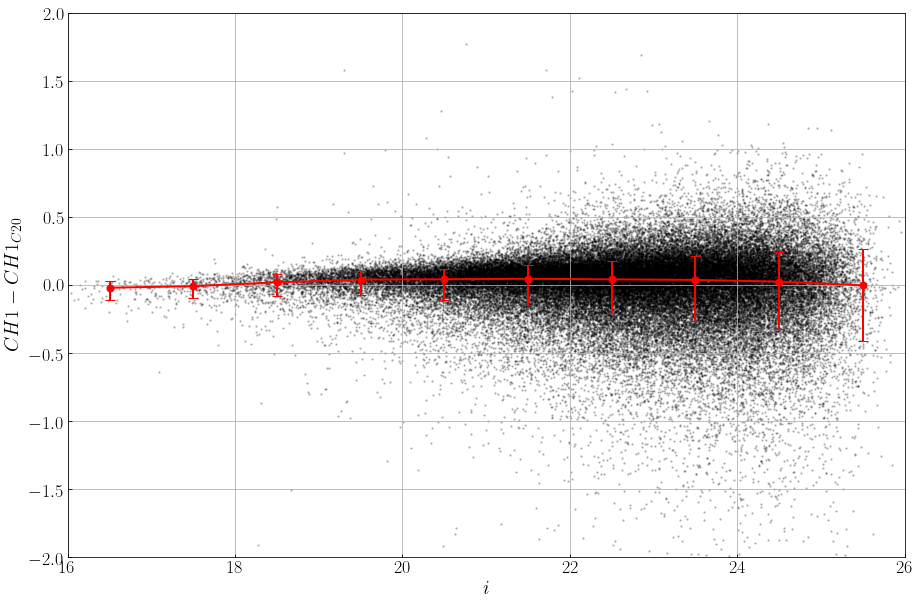

In [23]:
color_diff =  cat['MAG_AUTO_CH1']-cat['IRAC_CH1_MAG']
medians_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
per16_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic=percentile_16, bins=np.arange(16,27,1))
per84_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic=percentile_84, bins=np.arange(16,27,1))

fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.2)
plt.errorbar(bin_edges[:-1]+0.5,medians_ch1,yerr=[medians_ch1-per16_ch1,per84_ch1-medians_ch1],fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$CH1-CH1_{C20}$',fontsize=20)
plt.xlim([16,26])
plt.ylim([-2,2])
plt.grid()
plt.show()

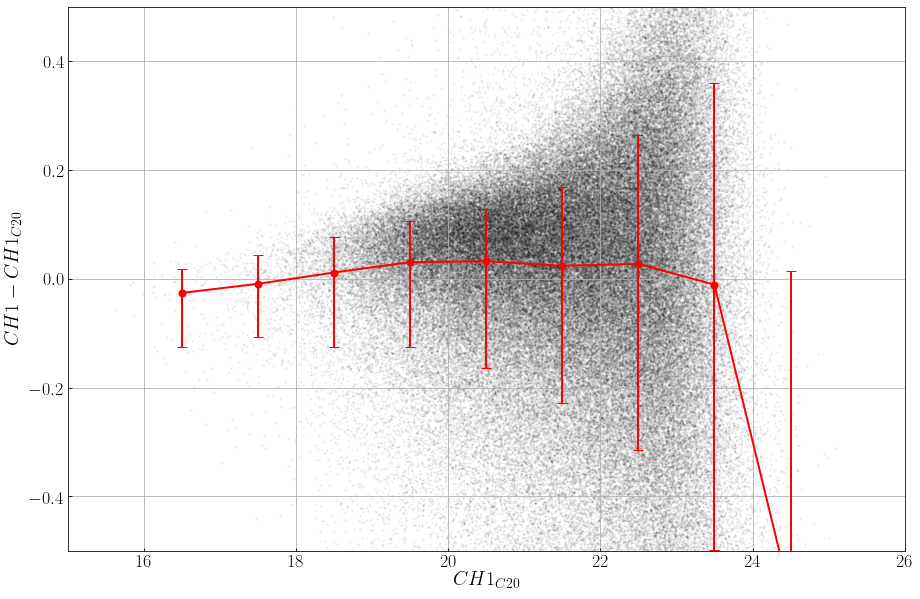

In [4]:
color_diff =  cat['MAG_AUTO_CH1']-cat['IRAC_CH1_MAG']
ch1_medians_ch1,ch1_bin_edgesch1_,bin_numbers = binned_statistic(cat['IRAC_CH1_MAG'], color_diff, statistic='median', bins=np.arange(16,27,1))
ch1_per16_ch1,ch1_bin_edges,ch1_bin_numbers = binned_statistic(cat['IRAC_CH1_MAG'], color_diff, statistic=percentile_16, bins=np.arange(16,27,1))
ch1_per84_ch1,ch1_bin_edges,ch1_bin_numbers = binned_statistic(cat['IRAC_CH1_MAG'], color_diff, statistic=percentile_84, bins=np.arange(16,27,1))

fig = plt.figure(figsize=(15,10))
plt.scatter(cat['IRAC_CH1_MAG'], color_diff,color='k',s=2, alpha=0.05)
plt.errorbar(ch1_bin_edges[:-1]+0.5,ch1_medians_ch1,yerr=[ch1_medians_ch1-ch1_per16_ch1,ch1_per84_ch1-ch1_medians_ch1],fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$CH1_{C20}$',fontsize=20)
plt.ylabel('$CH1-CH1_{C20}$',fontsize=20)
plt.xlim([15,26])
plt.ylim([-0.5,0.5])
plt.grid()
plt.show()

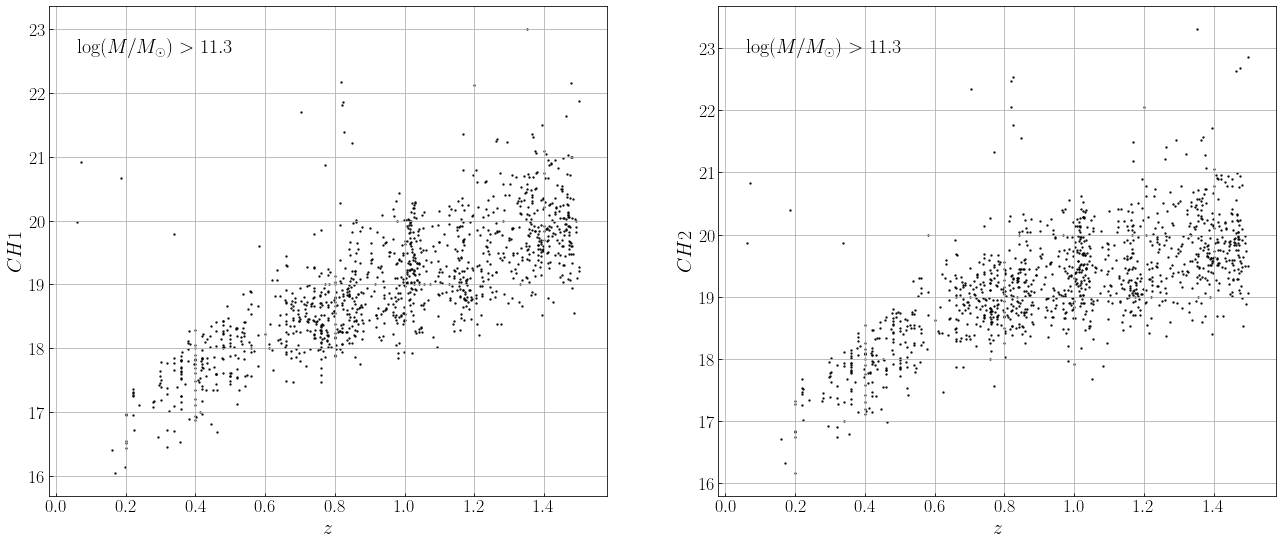

In [26]:
cat_massive = cat[cat['MASS_MED']>11.3]
fig, axs = plt.subplots(1, 2, figsize = (22, 9))

axs[0].scatter(cat_massive['ZPHOT'], cat_massive['MAG_AUTO_CH1'],color='k',s=2, alpha=0.8)
axs[1].scatter(cat_massive['ZPHOT'], cat_massive['MAG_AUTO_CH2'],color='k',s=2, alpha=0.8)

axs[0].set_xlabel('$z$',fontsize=20)
axs[1].set_xlabel('$z$',fontsize=20)
axs[0].set_xlim([-0.02,1.58])
axs[1].set_xlim([-0.02,1.58])
axs[0].set_ylabel('$CH1$',fontsize=20)
axs[1].set_ylabel('$CH2$',fontsize=20)

axs[0].annotate('$\log(M/M_\odot)>11.3$',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)
axs[1].annotate('$\log(M/M_\odot)>11.3$',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)

axs[0].grid()
axs[1].grid()
plt.show()

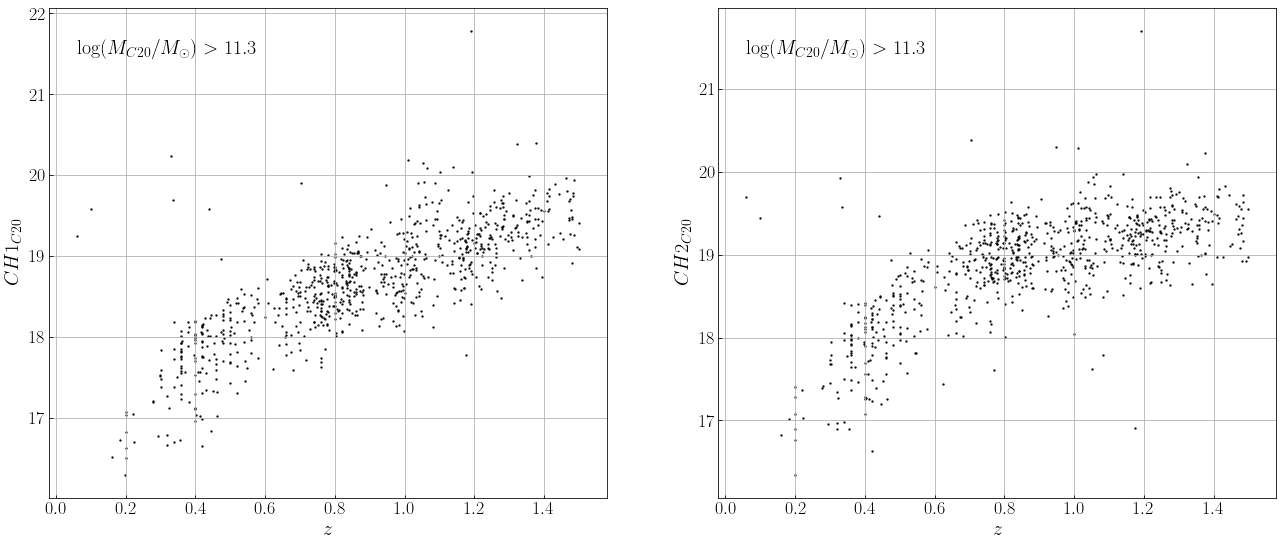

In [27]:
cat_massive = cat[cat['MASS_MED_C20']>11.3]
cat_massive = cat_massive[cat_massive['ZPHOT']>0]
cat_massive = cat_massive[cat_massive['IRAC_CH1_MAG']>0]
cat_massive = cat_massive[cat_massive['IRAC_CH2_MAG']>0]

fig, axs = plt.subplots(1, 2, figsize = (22, 9))
axs[0].scatter(cat_massive['ZPHOT'], cat_massive['IRAC_CH1_MAG'],color='k',s=2, alpha=0.8)
axs[1].scatter(cat_massive['ZPHOT'], cat_massive['IRAC_CH2_MAG'],color='k',s=2, alpha=0.8)

axs[0].set_xlabel('$z$',fontsize=20)
axs[1].set_xlabel('$z$',fontsize=20)
axs[0].set_xlim([-0.02,1.58])
axs[1].set_xlim([-0.02,1.58])
axs[0].set_ylabel('$CH1_{C20}$',fontsize=20)
axs[1].set_ylabel('$CH2_{C20}$',fontsize=20)

axs[0].annotate('$\log(M_{C20}/M_\odot)>11.3$',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)
axs[1].annotate('$\log(M_{C20}/M_\odot)>11.3$',xy=([0.05,0.9]),xycoords='axes fraction',fontsize=20)

axs[0].grid()
axs[1].grid()
plt.show()

[-0.144 -0.123 -0.098 -0.092 -0.081 -0.073 -0.065 -0.06  -0.028  0.024]
[0.33  0.319 0.346 0.361 0.213 0.237 0.283 0.332 0.408 0.508]


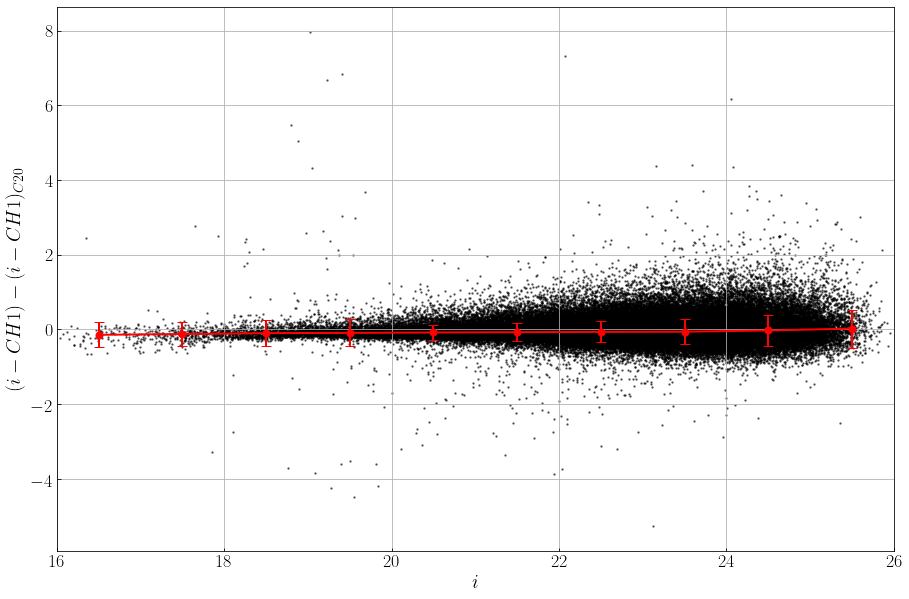

In [8]:
color_diff =  color_diff = (cat['i'] - cat['MAG_AUTO_CH1']) - (cat['HSC_i_MAG_AUTO'] - cat['IRAC_CH1_MAG'])
medians_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
stds_ch1,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='std', bins=np.arange(16,27,1))
print(medians_ch1)
print(stds_ch1)
fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.5)
plt.errorbar(bin_edges[:-1]+0.5,medians_ch1,yerr=stds_ch1,fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$(i-CH1)-(i-CH1)_{C20}$',fontsize=20)
plt.xlim([16,26])
# plt.ylim([-3,3])
plt.grid()
plt.show()

[-0.133 -0.15  -0.12  -0.103 -0.089 -0.076 -0.071 -0.064 -0.034  0.031]
[0.334 0.402 0.396 0.391 0.291 0.303 0.357 0.405 0.453 0.539]


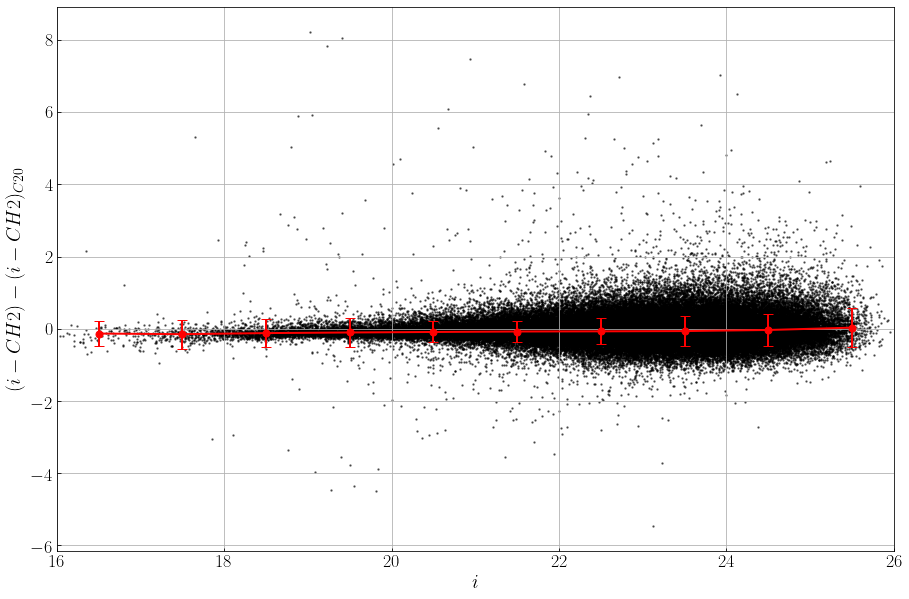

In [36]:
color_diff = (cat['i'] - cat['MAG_AUTO_CH2']) - (cat['HSC_i_MAG_AUTO'] - cat['IRAC_CH2_MAG'])
medians_ch2,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='median', bins=np.arange(16,27,1))
stds_ch2,bin_edges,bin_numbers = binned_statistic(cat['i'], color_diff, statistic='std', bins=np.arange(16,27,1))
print(medians_ch2)
print(stds_ch2)
fig = plt.figure(figsize=(15,10))
plt.scatter(cat['i'], color_diff,color='k',s=2, alpha=0.5)
plt.errorbar(bin_edges[:-1]+0.5, medians_ch2,yerr=stds_ch2,fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$i$',fontsize=20)
plt.ylabel('$(i-CH2)-(i-CH2)_{C20}$',fontsize=20)
plt.xlim([16,26])
# plt.ylim([-3,3])
plt.grid()
plt.show()

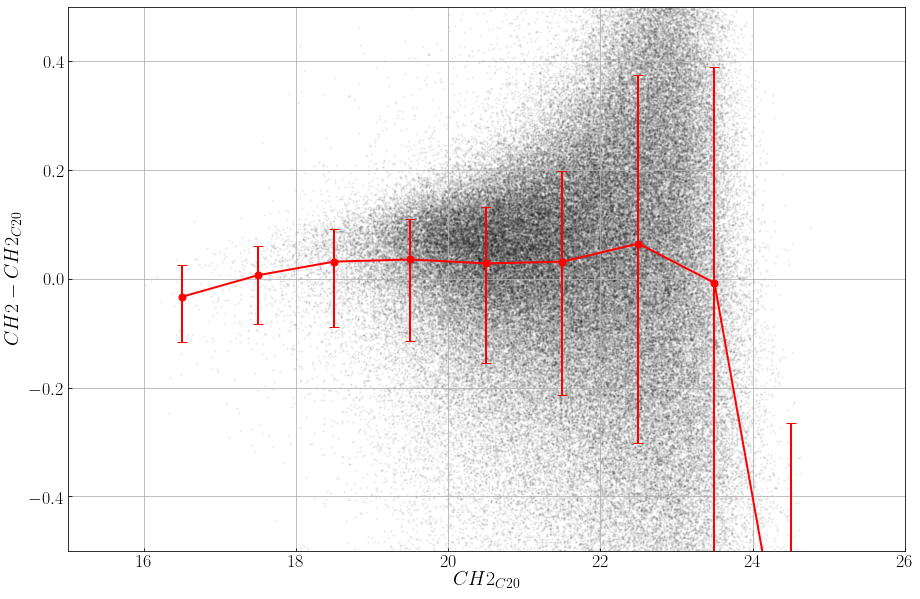

In [5]:
color_diff =  cat['MAG_AUTO_CH2']-cat['IRAC_CH2_MAG']
ch2_medians_ch2,ch2_bin_edges,ch2_bin_numbers = binned_statistic(cat['IRAC_CH2_MAG'], color_diff, statistic='median', bins=np.arange(16,27,1))
ch2_per16_ch2,bin_edges,ch2_bin_numbers = binned_statistic(cat['IRAC_CH2_MAG'], color_diff, statistic=percentile_16, bins=np.arange(16,27,1))
ch2_per84_ch2,bin_edges,ch2_bin_numbers = binned_statistic(cat['IRAC_CH2_MAG'], color_diff, statistic=percentile_84, bins=np.arange(16,27,1))

fig = plt.figure(figsize=(15,10))
plt.scatter(cat['IRAC_CH2_MAG'], color_diff,color='k',s=2, alpha=0.05)
plt.errorbar(ch2_bin_edges[:-1]+0.5,ch2_medians_ch2,yerr=[ch2_medians_ch2-ch2_per16_ch2,ch2_per84_ch2-ch2_medians_ch2],fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
plt.xlabel('$CH2_{C20}$',fontsize=20)
plt.ylabel('$CH2-CH2_{C20}$',fontsize=20)
plt.xlim([15,26])
plt.ylim([-0.5,0.5])
plt.grid()
plt.show()

#### write corrected magnitudes to catalog

In [8]:
cat=Table.read('/Volumes/LejaySSD/COSMOS_deep_CLAUDS_v9_CH1_CH2.fits')
print(len(cat))
ch1_corr_list=[]
ch2_corr_list=[]
ch1_corr_err_list=[]
ch2_corr_err_list=[]
for gal in tqdm(cat):
    
    # ch1
    if gal['MAG_AUTO_CH1']>-99:
        ch1_corr = gal['MAG_AUTO_CH1'] - np.interp(gal['i'],bin_edges[:-1]+0.5,ch1_medians_ch1)
        phot_err = gal['MAGERR_AUTO_CH1']
        calib_err = (np.interp(gal['MAG_AUTO_CH1'],ch1_bin_edges[:-1]+0.5,ch1_per84_ch1) - np.interp(gal['MAG_AUTO_CH1'],ch1_bin_edges[:-1]+0.5,ch1_per16_ch1))/2
        ch1_corr_err = np.sqrt(phot_err**2 + calib_err**2)
        
        ch1_corr_list.append(ch1_corr)
        ch1_corr_err_list.append(ch1_corr_err)
    else:
        ch1_corr_list.append(-99)
        ch1_corr_err_list.append(99)
    
    # ch2
    if gal['MAG_AUTO_CH2']>-99:
        ch2_corr = gal['MAG_AUTO_CH2'] - np.interp(gal['i'],bin_edges[:-1]+0.5,ch2_medians_ch2)
        phot_err = gal['MAGERR_AUTO_CH2']
        calib_err = (np.interp(gal['MAG_AUTO_CH2'],ch2_bin_edges[:-1]+0.5,ch2_per84_ch2) - np.interp(gal['MAG_AUTO_CH2'],ch2_bin_edges[:-1]+0.5,ch2_per16_ch2))/2
        ch2_corr_err = np.sqrt(phot_err**2 + calib_err**2)
        
        ch2_corr_list.append(ch2_corr)
        ch2_corr_err_list.append(ch2_corr_err)
    else:   
        ch2_corr_list.append(-99)
        ch2_corr_err_list.append(99)
    
ch1_corr_col = Column(name='MAG_AUTO_CH1_CORR', data=np.array(ch1_corr_list))
ch2_corr_col = Column(name='MAG_AUTO_CH2_CORR', data=np.array(ch2_corr_list))
ch1_corr_err_col = Column(name='MAGERR_AUTO_CH1_CORR', data=np.array(ch1_corr_err_list))
ch2_corr_err_col = Column(name='MAGERR_AUTO_CH2_CORR', data=np.array(ch2_corr_err_list))
print(len(ch1_corr_col),len(ch2_corr_col),len(ch1_corr_err_col),len(ch2_corr_err_col))

cat.add_columns([ch1_corr_col,ch2_corr_col,ch1_corr_err_col,ch2_corr_err_col])
cat = cat['ID','MAG_AUTO_CH1_CORR','MAG_AUTO_CH2_CORR','MAGERR_AUTO_CH1_CORR','MAGERR_AUTO_CH2_CORR']
cat.write('/Volumes/LejaySSD/COSMOS_deep_CLAUDS_v9_CH1_CH2_corr.fits', overwrite=True)

  0%|          | 0/5263013 [00:00<?, ?it/s]

5263013


100%|██████████| 5263013/5263013 [01:19<00:00, 65990.67it/s] 


5263013 5263013 5263013 5263013
